In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28*28))/ 255.0
test_images = test_images.reshape((10000, 28*28))/255.0

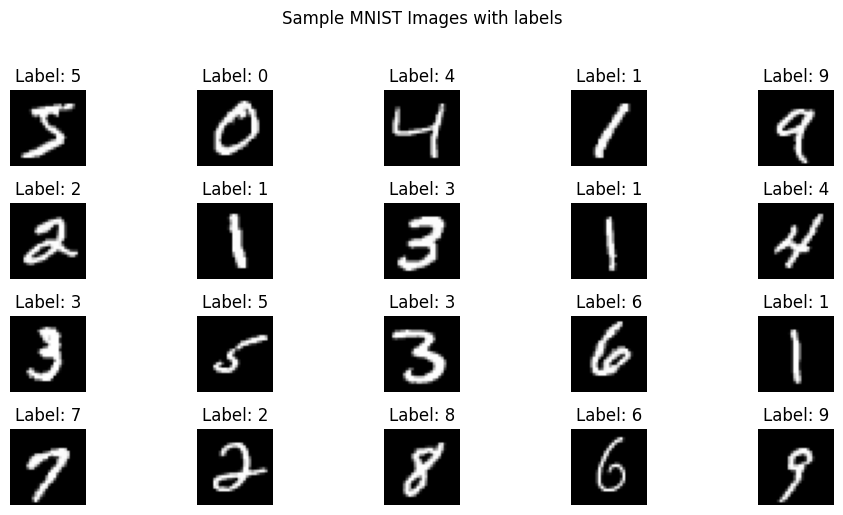

In [5]:
plt.figure(figsize = (10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[i].reshape(28, 28), cmap = 'gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.suptitle('Sample MNIST Images with labels', y = 1.02)
plt.tight_layout()
plt.show()

In [6]:
from tensorflow.keras import regularizers

model = models.Sequential([
    layers.Dense(1024, activation='swish', kernel_regularizer=regularizers.l2(1e-4), input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dropout(0.4),

    layers.Dense(512, activation='swish', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(256, activation='swish', kernel_regularizer=regularizers.l2(1e-4)),
    layers.BatchNormalization(),
    layers.Dropout(0.1),

    layers.Dense(10, activation='softmax')
])

C:\Users\VIGHNESH\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [8]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

lr_schedule = ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.5, patience=2, verbose=1
)

early_stop = EarlyStopping(
    monitor='val_accuracy', patience=5, restore_best_weights=True
)

history = model.fit(
    train_images, train_labels,
    epochs=75,
    batch_size=128,
    validation_data=(test_images, test_labels),
    callbacks=[lr_schedule, early_stop]
)

Epoch 1/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.8824 - loss: 0.5617 - val_accuracy: 0.9693 - val_loss: 0.2612 - learning_rate: 0.0010
Epoch 2/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9611 - loss: 0.2867 - val_accuracy: 0.9731 - val_loss: 0.2404 - learning_rate: 0.0010
Epoch 3/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.9707 - loss: 0.2432 - val_accuracy: 0.9751 - val_loss: 0.2227 - learning_rate: 0.0010
Epoch 4/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9737 - loss: 0.2228 - val_accuracy: 0.9783 - val_loss: 0.2077 - learning_rate: 0.0010
Epoch 5/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9769 - loss: 0.2078 - val_accuracy: 0.9790 - val_loss: 0.2000 - learning_rate: 0.0010
Epoch 6/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 22ms/step - accuracy: 0.9774 - loss: 0.1996 - val_accuracy: 0.9760 - val_loss: 0.2113 - learning_rate: 0.0010
Epoch 7/75
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9793 - l

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"\nTest accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9860 - loss: 0.1150

Test accuracy: 0.9885


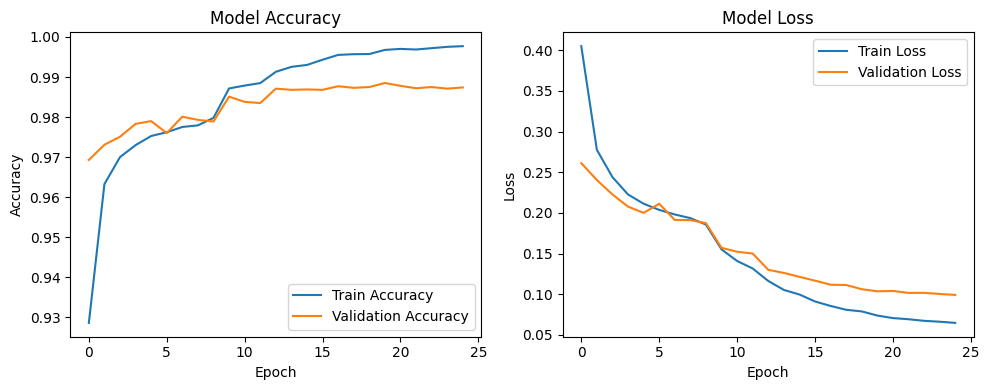

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


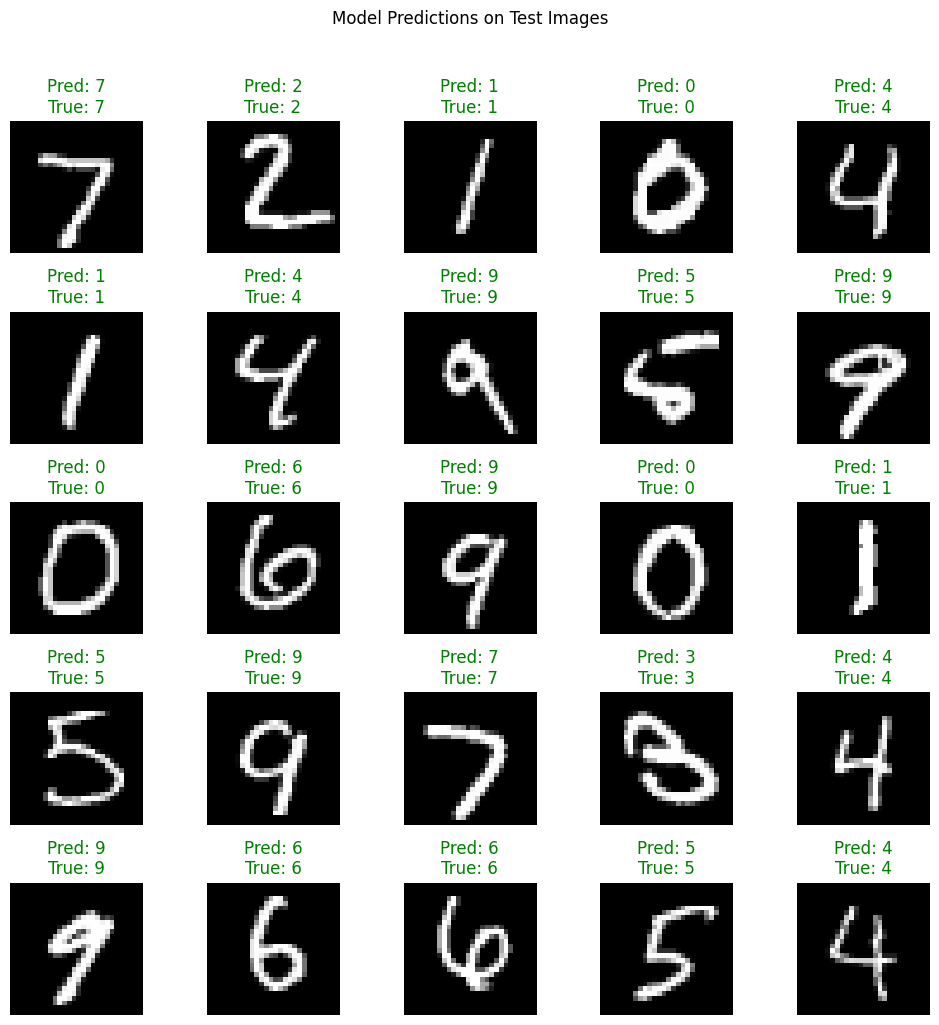

In [ ]:
predictions = model.predict(test_images)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    pred_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    color = 'green' if pred_label == true_label else 'red'
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color)
    plt.axis('off')
plt.suptitle('Model Predictions on Test Images', y=1.02)
plt.tight_layout()
plt.show()